![example](images/director_shot.jpeg)

# Microsoft Movies Analysis 

**Author:** Ngoc Ho
***

## Table of contents:

### 1. Overview
### 2.Business Problem
### 3.Data Understanding
### 4.Importing standard packages
### 5.Data exploration
    
   **5.1. IMDb**
    
   **5.2. Box office Mojo**
    
   **5.3. The Numbers (TN)**

### 6.Data Preparation

   **6.1. IMDb**
    
        a. title.basics
            - Removing nulls and replacing with appropriate values
        b. title.ratings
            - Renaming columns names 
            - Merging title.basics and title.ratings to create dataframe df_1n2

   **6.2. Box office Mojo**
    
        - Removing Nulls and replacing with approprriate values
        - Convert data types
        - Renaming columns 
        - Merging df_1n2 & bom.movies_gross to creae dataframe df_gross

   **6.3. The Numbers**
    
        - Converting data types of gross columns
        - Creating new columns and convert release_date to release_season and release_year
        - Renaming movie column to primary_title and merging top_rating to df_4

### 7. Data Modeling

   **7.1. IMBd**
    
        a. Most common genre
        b. Genres with average rating >= 8 & highest number of votes
        c. Runtime
    
   **7.2. Box office Mojo**
    
        a. Highest gross genres domestically and globally
        b. Correlation between domestic and global gross
        c. Highest gross and rated studios

   **7.3. The Numbers**
    
        a. Most profitable season to release movie using return on investment (ROI) 
        b. Most profitable season to release movie based on net profit using median(), max()
        c. Correlation between production budget and profit
        d. Production Budget
        e. Most profitable genres seasonally

### 8. Evaluation
### 9. Conclusions
### 10. Limitations
### 11. Future Considerations

## 1. Overview

This project analyses the movies market using data from IBDM database, Box office Mojo and The Numbers. Descriptive data analysis of title rating and domestic/worldwide gross income showed the most popular and top performing movie genre. This data analysis showed showed profit varies seasonally and budget required to make a movie. Results from this data analyis can guide Microsoft's decision on genre of movies, production budget and release timeline. 

## 2. Business Problem

Microsoft is interested in starting up a movie studio however they lack knowledge about the movie market. They would like to know which movie is doing well to help them decide which movie to create. By finding out which genre has the highest rating and has the most gross income domestically and internationally which give Microsoft insights to decide which genre of film to make, set budget and release date for maximum profit. 

To successfully set up a new movie studio, we have to consider:
- Components of the film such as genre, runtime, casts, crews 
- Business aspects such as budget, profit margin
- Strategy aspects such as best time to release, marketing strategies, etc,.

Data analytic questions that might help explores the above points:
- Which movie genres has highest rating/most popular?
- Which movie genres has high grossing? Which current studio is making top grossing movies?
- What is a typical runtime of top rating movies?
- Which season best to release a movie?
- What is the average budget for a movies?
- Does higher budget correlates to higher profit?


## 3. Data Understanding

The internet movie database (IMDb) is an online database of information related to films, televison series, home videos, video games and streaming content online. This database includes title, genre, ratings and number of votes. the IMDb database is updated daily. We also used data from IMDb subsidiary Box Office Mojo and The number database for movie financial details such as release date, budgets, domestic and worldside box office gross. Our target variable are genre, average rating and number of votes to determine which genre is most popular and has high rating. We also target variables such as domestic, worldwide box office gross and budget to identify most profitable genre and which release season optimise profit. We will be utilising pandas functions to find means, median, count correllation and trends to establish relationship between variables. Seaborn and matplotlib will helps us transform our analysed results into visualisation to help aid understanding of our dataset and decision making. 

## 4. Import standard packages

In [18]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(context='notebook', palette='pastel', 
              style='whitegrid', font='sans-serif', font_scale=1.25, 
              color_codes=True, rc={'figure.figsize':(10,8)})

## 5. Data exploration

## 5.1 IMDb

IMDb database consists of multiple tables on various information about movies. The two dataset we will be using are : title.basics and title.ratings.

The title.basics table includes movie titles, release year, and genres with 146144 titles and 6 columns. The title.ratings table includes average movie rating and number of votes with 73856 rows x 3 columns. The primary key for both tables is tconst.

Target data include genres, runtime minutes, average rating and number of votes. 

In [19]:
#importing title basics data set from IMDd + displaying 1st 5 rows using head
df_1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
#Finding nulls in df_1
df_1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [22]:
#Finding duplicates in df_1
df_1.duplicated().sum()

0

In [23]:
df_1.tconst.duplicated().sum()

0

In [24]:
#importing title ratings data set from IMDd + displaying 1st 5 rows using head
df_2 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
#Finding nulls in df_2
df_2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [27]:
#Finding duplicates in df_2
df_2.duplicated().sum()

0

In [28]:
df_2.tconst.duplicated().sum()

0

## 5.2 Box office Mojo

Box office Mojo dataset contains information on 3387 movies entries and 5 columns of data points of their domestic, foreign gross, studio and production year. 
Target variables : domestic and foreign gross and studio.

In [29]:
#importing title box office gross data set from boc office mojo + displaying 1st 5 rows using head
df_3 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [30]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
#Finding nulls in df_3
df_3.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [32]:
#Finding duplicates in df_3
df_3.title.duplicated().sum()

1

In [33]:
df_3[df_3.title.duplicated(keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


- Duplicates looks like a remake release year different - ok to keep 

## 5.3 The Numbers
The numbers dataset contains records of 5782 movies entries with 6 columns containing data points on the movie's production budget, domestic gross, worldwide gross and release date from 1915 to 2020.
Target variables: production budget, domestic, worldwide gross and release date.

In [34]:
#importing title budget data set from the Numbers + displacing 1st 5 rows using head
df_4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [35]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [36]:
#Finding nulls in df_4
df_4.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [37]:
#Finding duplicates in df_4
df_4.duplicated().sum()

0

In [38]:
df_4.movie.duplicated().sum()

84

In [39]:
df_4[df_4.movie.duplicated(keep=False)].sort_values(by='movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,71,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
1648,49,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621"
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
...,...,...,...,...,...,...
3403,4,"Apr 21, 2017",Unforgettable,"$12,000,000","$11,368,012","$16,221,211"
1420,21,"Feb 18, 2011",Unknown,"$40,000,000","$63,686,397","$136,123,083"
4583,84,"Nov 3, 2006",Unknown,"$3,700,000","$26,403","$3,355,048"
2313,14,"Sep 16, 2005",Venom,"$25,000,000","$881,745","$881,745"


- Duplicates are remakes of movies - ok to keep 

## 6. Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## 6.1 IMDb

### a. title.basics
Data cleaning for df_1 (144146 index entries row x 6 columns of 6 variables)

Target variables: title & genre 

What to clean:
- Runtime has 31739 missing values - using .describe() to look at properties of data - even distribution with median and mean are similar value - replace nulls with .median() 
- Genre has 5408 missing values - since genre is a categorical variable - 3 days we can deal with missing values - drop, or change label to 'Missing' or replace with mode. Drop is not an option as we need the data, we can either label as missing or replace with mode. Let's find out if all categories are even if one categories stand out more than the rest we can replace missing values with mode otherwise replacing it with a categories while all categories are even can skew data set significantly. 

In [40]:
#Finding how many percentage of data in runtime column are nulls  
df_1.runtime_minutes.isna().value_counts(normalize=True)

False    0.782824
True     0.217176
Name: runtime_minutes, dtype: float64

In [41]:
df_1.runtime_minutes.describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [42]:
#runtime has very even distribution - we can replace nulls using either mean or median 
df_1.runtime_minutes.fillna(df_1['runtime_minutes'].median(), inplace=True)
df_1.runtime_minutes.isna().sum()

0

In [43]:
# cleaning genre column 
#find which genre is mode (highest value count)
df_1['genres'].value_counts(normalize=True)

Documentary                0.228691
Drama                      0.152669
Comedy                     0.065207
Horror                     0.031065
Comedy,Drama               0.025004
                             ...   
History,Mystery,Romance    0.000007
Biography,Drama,Western    0.000007
Fantasy,History,Musical    0.000007
Crime,Family,Thriller      0.000007
Documentary,Horror,News    0.000007
Name: genres, Length: 1085, dtype: float64

- Documentary is the mode about 22% of data set. Another option to deal with missing value is to distributed according to relative probability top 5 categories in the dataset  

In [44]:
df_1['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [45]:
#Replacing missing values with 'Missing'
df_1['genres'].fillna('Missing', inplace=True)
df_1.isna().sum()

tconst              0
primary_title       0
original_title     21
start_year          0
runtime_minutes     0
genres              0
dtype: int64

- Double the relative probabilities of the top 5 categories because they account for 50% of the whole data set. The other 50% of data are spread out with 1080 other genres which makes them insignificant

In [46]:
rel_prob = [0.46, 0.30, 0.14,0.06, 0.04]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_genre(value):
    if value == 'Missing':
        return np.random.choice(['Documentary','Drama','Comedy', 'Horror', 'Comedy,Drama'], p=prob)
    else:
        return value
df_1['genres'] = df_1['genres'].map(lambda x: impute_genre(x))
df_1['genres'].value_counts(normalize=True)

Documentary                0.237608
Drama                      0.158282
Comedy                     0.067926
Horror                     0.031825
Comedy,Drama               0.025400
                             ...   
History,Mystery,Romance    0.000007
Biography,Drama,Western    0.000007
Fantasy,History,Musical    0.000007
Crime,Family,Thriller      0.000007
Documentary,Horror,News    0.000007
Name: genres, Length: 1085, dtype: float64

In [47]:
df_1['genres'].isna().sum()

0

### b. title.ratings
Data cleaning for df_2 (73856 rows x 3 columns)

What to clean: 
- Change columns name of average rating and num of votes for clarity/formatting 

In [48]:
df_2.rename(columns={'averagerating' : 'average rating', 'numvotes' : 'no. of votes'}, inplace=True)
df_2.columns

Index(['tconst', 'average rating', 'no. of votes'], dtype='object')

**Find the most common genres with high ratings by combining df_1 and df_2**

In [49]:
#Merging df_1 & df_2
df_1n2 = pd.merge(df_1, df_2, how='outer')
df_1n2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Documentary,NaN,NaN


Since df_1 has way more data rows than df_2, there will be alot of nulls in average rating and number of votes. Our focus is on movies with high rating and number of votes to find the top genre of movies therefore we will drop any nulls values in average rating and number of votes. 

In [50]:
df_1n2.dropna(subset=['average rating', 'no. of votes'], inplace=True)
df_1n2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   average rating   73856 non-null  float64
 7   no. of votes     73856 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1+ MB


- To find the top rating movies we can use .loc() to filter only movies with rating >=8

In [51]:
top_rating = df_1n2.loc[df_1n2['average rating'] >= 8]
top_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
78,tt0406282,Bubbles,Bubbles,2011,80.0,Drama,8.6,18.0
96,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14.0
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0


## 6.2 Box office Mojo
Data cleaning for df_3 (3387 rows x 5 columns)

What to clean:
- Nulls domestic gross has 28 nulls and foreign gross has 1350 nulls - replace missing values with median() to avoid using mean() which could potentially skew data due to outliers
- Foreign gross is in object data type - convert to int64 for data calculation,
- Changing 'title' column name to 'primary_title' to allow merging of title.basics& title.ratings and bom.movie_gross later

In [52]:
#convert foreign gross from object to float data type 
df_3['foreign_gross'] = pd.to_numeric(df_3['foreign_gross'], errors='coerce')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [53]:
#Find properties of both domestic gross and foreign gross 
df_3.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


- Gross is a continuous data and from the table above, median is the best choice to replace missing values as the mean is skewed by outliers. 

In [54]:
#replacing missing values with median in both domestic and foreign gross 
df_3['domestic_gross'].fillna(df_3['domestic_gross'].median(), inplace=True)
df_3['foreign_gross'].fillna(df_3['foreign_gross'].median(), inplace=True)

In [55]:
df_3.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [56]:
df_3.rename(columns={'title' : 'primary_title'}, inplace=True)
df_3

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


**Merging df_1n2  and bom.movie_gross**

In [57]:
#Merging df_1n2 and df_3
df_gross = pd.merge(df_1n2, df_3, how='right', on = 'primary_title')
df_gross.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes,studio,domestic_gross,foreign_gross,year
0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,BV,415000000.0,652000000.0,2010
1,NaN,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,NaN,NaN,BV,334200000.0,691300000.0,2010
2,NaN,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,NaN,NaN,WB,296000000.0,664300000.0,2010
3,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000.0,535700000.0,2010
4,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,P/DW,238700000.0,513900000.0,2010


In [58]:
df_gross.isna().sum()

tconst             788
primary_title        0
original_title     788
start_year         788
runtime_minutes    788
genres             788
average rating     788
no. of votes       788
studio               5
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

Nulls values in genres however no nulls in domestic_gross and foreign gross after merging. Our target variables are gross columns hence ok to leave nulls in genres. 

## 6.3 The Numbers

Data cleaning for df_4 (5782 rows x 6 columns)

What to clean:
- Convert all gross columns from object to float
- Convert release date into new column called release_season
- Convert release date into date data type to classify releasing date into years in new column 'release_year' 
- Change movie column name to 'primary_title' for merging dataframes 


In [59]:
#removing '$' and ',' from 'prodction_budget', 'domestic_gross' and 'worldwide_gross' to allow conversion to integer
df_4['production_budget'] = df_4['production_budget'].map(lambda x: x.split()[0].replace('$', ''))
df_4['production_budget'] = df_4['production_budget'].map(lambda x: x.replace(',', ''))
df_4['production_budget'] = df_4['production_budget'].astype(int)

df_4['domestic_gross'] = df_4['domestic_gross'].map(lambda x: x.split()[0].replace('$', ''))
df_4['domestic_gross'] = df_4['domestic_gross'].map(lambda x: x.replace(',', ''))
df_4['domestic_gross'] = df_4['domestic_gross'].astype(int)

df_4['worldwide_gross'] = df_4['worldwide_gross'].map(lambda x: x.split()[0].replace('$', ''))
df_4['worldwide_gross'] = df_4['worldwide_gross'].map(lambda x: x.replace(',', ''))
df_4['worldwide_gross'] = df_4['worldwide_gross'].astype(int)


In [60]:
#creating new column called release_season
season = df_4['release_date'].map(lambda x:'Winter' if any([word in x for word in ['Dec', 'Jan', 'Feb']]) 
                          else 'Spring' if any([word in x for word in ['Mar', 'Apr', 'May']])
                         else 'Summer' if any([word in x for word in ['Jun', 'Jul', 'Aug']]) else 'Autumn')
df_4['release_season'] = season
df_4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Winter
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Autumn


In [61]:
#adding new column that sort out date in to year 
df_4['release_year'] = pd.DatetimeIndex(df_4['release_date']).year
df_4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_season,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,2017


In [62]:
df_4.rename(columns={'movie' : 'primary_title'}, inplace=True)
df_3

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,18900000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,18900000.0,2018
3384,El Pacto,Sony,2500.0,18900000.0,2018
3385,The Swan,Synergetic,2400.0,18900000.0,2018


**Merging top_rating and df_4 to create dataframe genre_season**
- To find which genres are performing well seasonally
- We're merging df top rating with df_4 on right merge to preserve keys on df_4 because our target variables are season and net profit to measure each genre performance seasonally 

In [63]:
genre_season = pd.merge(top_rating, df_4, how='right', on = 'primary_title')
genre_season.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes,id,release_date,production_budget,domestic_gross,worldwide_gross,release_season,release_year
0,NaN,Avatar,NaN,NaN,NaN,NaN,NaN,NaN,1,"Dec 18, 2009",425000000,760507625,2776345279,Winter,2009
1,NaN,Pirates of the Caribbean: On Stranger Tides,NaN,NaN,NaN,NaN,NaN,NaN,2,"May 20, 2011",410600000,241063875,1045663875,Spring,2011
2,NaN,Dark Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,3,"Jun 7, 2019",350000000,42762350,149762350,Summer,2019
3,NaN,Avengers: Age of Ultron,NaN,NaN,NaN,NaN,NaN,NaN,4,"May 1, 2015",330600000,459005868,1403013963,Spring,2015
4,NaN,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN,NaN,NaN,NaN,5,"Dec 15, 2017",317000000,620181382,1316721747,Winter,2017


## 7. Data Modeling
Describe and justify the process for analyzing or modeling the data.



## 7.1 IMDb
**a. Most common genre**

- From df_1, we can use function .value_counts to find the most common genre 

In [64]:
df_1['genres'].value_counts()

Documentary                34725
Drama                      23132
Comedy                      9927
Horror                      4651
Comedy,Drama                3712
                           ...  
History,Mystery,Romance        1
Biography,Drama,Western        1
Fantasy,History,Musical        1
Crime,Family,Thriller          1
Documentary,Horror,News        1
Name: genres, Length: 1085, dtype: int64

- Documentary is the most common genre.

- To find the top rating movies we can use .loc() to filter only movies with rating >=8

In [65]:
top_rating = df_1n2.loc[df_1n2['average rating'] >= 8]
top_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
78,tt0406282,Bubbles,Bubbles,2011,80.0,Drama,8.6,18.0
96,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14.0
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0


**b. Genres with average rating >= 8 & highest number of votes**

In [66]:
top_rating.describe()

,start_year,runtime_minutes,average rating,no. of votes
count,9448.000000,9448.000000,9448.000000,9.448000e+03
mean,2014.673688,88.403577,8.485976,3.857123e+03
std,2.667943,36.011607,0.394040,5.112994e+04
min,2010.000000,4.000000,8.000000,5.000000e+00
25%,2012.000000,74.000000,8.200000,8.000000e+00
50%,2015.000000,87.000000,8.400000,1.400000e+01
75%,2017.000000,96.000000,8.800000,3.600000e+01
max,2019.000000,1440.000000,10.000000,1.841066e+06


In [67]:
top_rating.groupby('genres')['no. of votes'].max().sort_values(ascending=False)

genres
Action,Adventure,Sci-Fi    1841066.0
Action,Thriller            1387769.0
Adventure,Drama,Sci-Fi     1299334.0
Drama,Western              1211405.0
Biography,Crime,Drama      1035358.0
                             ...    
Animation,Comedy,Crime           5.0
Family,Mystery                   5.0
Biography,Comedy,Music           5.0
Drama,News                       5.0
Drama,History,Sport              5.0
Name: no. of votes, Length: 459, dtype: float64

Creating a horizontal bar map to illustrate the top 5 with average rating >= 8 and highest votes 

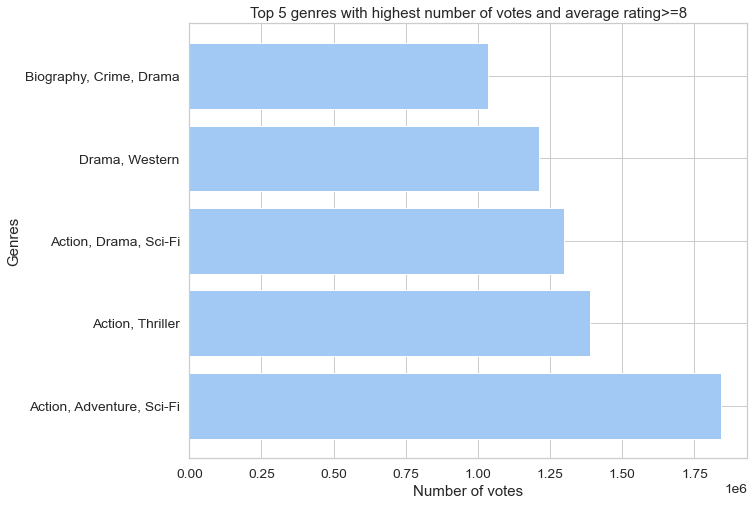

In [129]:
#graph showing genre with the highest number of votes with average rating>=8
fig_1, ax = plt.subplots()
x = ['Action, Adventure, Sci-Fi','Action, Thriller','Action, Drama, Sci-Fi','Drama, Western','Biography, Crime, Drama']
y = [1841066.0,1387769.0,1299334.0,1211405.0,1035358.0]
ax.barh(x,y)
ax.set_title('Top 5 genres with highest number of votes and average rating>=8')
ax.set_xlabel('Number of votes')
ax.set_ylabel('Genres')
plt.savefig('fig_1.png');

**c. Runtime**
- Find average runtime of movies with rating >=8 

In [69]:
runtime = pd.DataFrame( {'genre': top_rating.genres.unique(),'runtime': top_rating.runtime_minutes.median()})
runtime_1 = runtime.reset_index()
runtime_1

,index,genre,runtime
0,0,"Adventure,Animation,Comedy",87.0
1,1,Drama,87.0
2,2,Documentary,87.0
3,3,"Comedy,Drama,Romance",87.0
4,4,"Action,Comedy,Crime",87.0
...,...,...,...
454,454,"Comedy,History",87.0
455,455,"Adventure,Mystery",87.0
456,456,"Drama,Short",87.0
457,457,"Action,History,War",87.0


In [70]:
top_rating_runtime = top_rating.loc[top_rating['runtime_minutes'] < 200]
top_rating_runtime

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,average rating,no. of votes
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
78,tt0406282,Bubbles,Bubbles,2011,80.0,Drama,8.6,18.0
96,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14.0
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
...,...,...,...,...,...,...,...,...
146072,tt9905796,July Kaatril,July Kaatril,2019,87.0,Romance,9.0,5.0
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


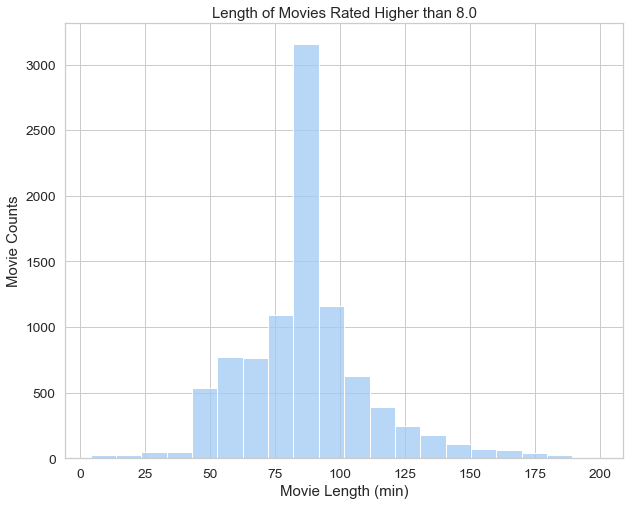

In [115]:
hist = sns.histplot(top_rating_runtime['runtime_minutes'], bins=20)

hist.set(xlabel='Movie Length (min)', ylabel='Movie Counts');
hist.set_title('Length of Movies Rated Higher than 8.0', fontsize=15)
plt.savefig('hist.png');

**Typical runtime of movies with average rating >=8 is around 87 minutes (median runtime = 87). Also histogram shows most movies in this group is between 80-100 minutes.**

## 7.2 Box office Mojo
bom.movie_gross has data on information on gross box office, merging df_1n2 and df_3 to determine which movie genre has high average rating and gross. We're doing a right merge on primary titles because our target variable is gross, we want to preserve all data values in this data frame. We only want to find out which genre has the highest gross titles. 

In [72]:
df_gross.describe()

,start_year,runtime_minutes,average rating,no. of votes,domestic_gross,foreign_gross,year
count,3027.000000,3027.000000,3027.000000,3.027000e+03,3.815000e+03,3.815000e+03,3815.000000
mean,2013.783284,106.903204,6.457582,6.170030e+04,2.849132e+07,5.194397e+07,2013.987418
std,2.466955,20.073663,1.012277,1.255132e+05,6.595502e+07,1.085718e+08,2.488221
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,93.000000,5.900000,2.117000e+03,1.235000e+05,1.130000e+07,2012.000000
50%,2014.000000,104.000000,6.600000,1.310900e+04,1.400000e+06,1.890000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,2.860000e+07,2.965000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,9.367000e+08,9.605000e+08,2018.000000


**a. Highest gross genres domestically and globally**

In [73]:
#Finding the highest domestic gross genre 
df_gross.loc[:,('domestic_gross','genres', 'year','studio')].sort_values(by='domestic_gross', ascending=False)

,domestic_gross,genres,year,studio
2082,936700000.0,NaN,2015,BV
3465,700100000.0,"Action,Adventure,Sci-Fi",2018,BV
3464,678800000.0,"Action,Adventure,Sci-Fi",2018,BV
2083,652300000.0,"Action,Adventure,Sci-Fi",2015,Uni.
823,623400000.0,NaN,2012,BV
...,...,...,...,...
1138,400.0,"Horror,Thriller",2012,Magn.
3084,300.0,NaN,2016,KL
3085,300.0,Horror,2016,Magn.
2595,300.0,Drama,2015,FM


<AxesSubplot:xlabel='genres'>

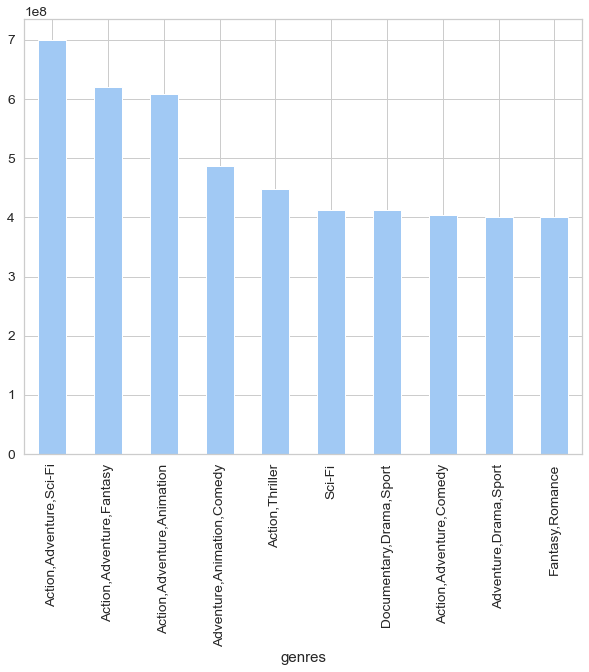

In [123]:
dom = df_gross.groupby('genres')['domestic_gross'].max().sort_values(ascending=False)
dom[0:10].plot(kind='bar')

<AxesSubplot:xlabel='genres'>

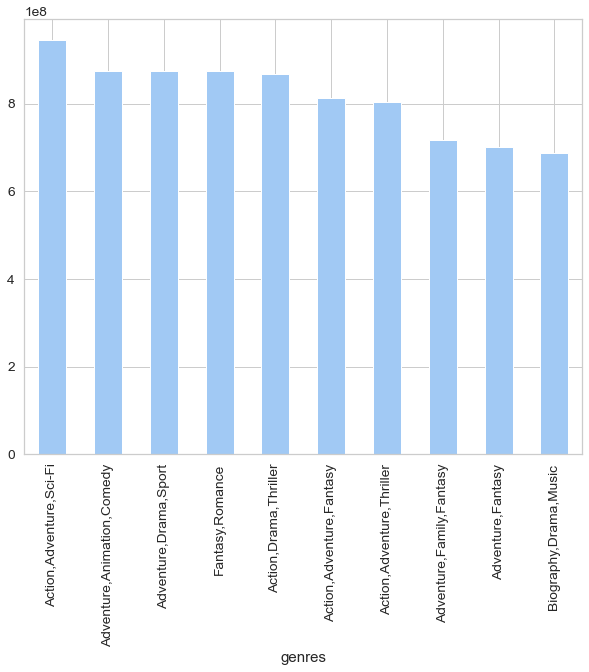

In [126]:
worldwide = df_gross.groupby('genres')['foreign_gross'].max().sort_values(ascending=False)
worldwide[0:10].plot(kind='bar')

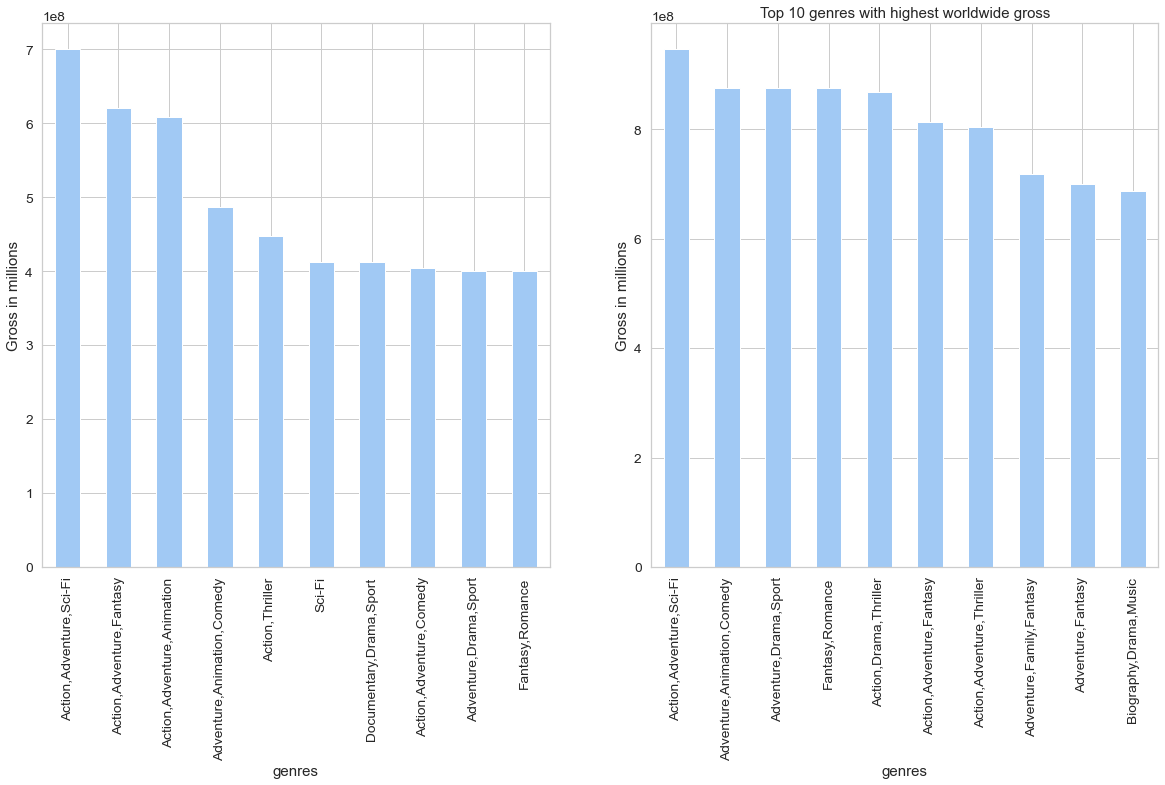

In [128]:
fig_2, axes = plt.subplots(figsize = (20,10), ncols=2)
dom[0:10].plot(kind='bar', ax=axes[0])
worldwide[0:10].plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 genres with highest domestic gross')
axes[1].set_title('Top 10 genres with highest worldwide gross')
axes[0].set_ylabel('Gross in millions')
axes[1].set_ylabel('Gross in millions')
plt.savefig('fig_2.png');

- Action, Adventure, Sci-fi has the highest gross domestically and internationally 
- Investigate whether there is any correlation between domestic gross and international gross

**b. Correlation between domestic and global gross**

In [76]:
#Finding correlation between domestic and international gross 
corr_gross = df_gross['domestic_gross'].corr(df_gross['foreign_gross'])
corr_gross

0.7916699469891144

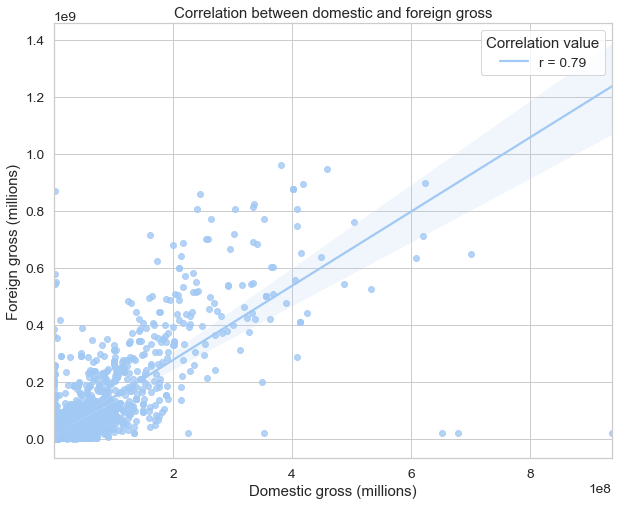

In [77]:
reg = sns.regplot(x=df_gross['domestic_gross'], y=df_gross["foreign_gross"])
reg.set(xlabel='Domestic gross (millions)', ylabel='Foreign gross (millions)')
reg.set_title('Correlation between domestic and foreign gross', fontsize=15)
reg.legend(title='Correlation value', loc='upper right', labels=['r = 0.79']);

**c. Highest gross and rated studios**

In [78]:
#Finding which studio has the most movies with average rating >=8 
studio_1 = df_gross.studio.value_counts()
studio_1

IFC         183
Uni.        176
Fox         157
WB          154
Magn.       153
           ... 
KC            1
Arrow         1
AM            1
Blue Fox      1
Myr.          1
Name: studio, Length: 257, dtype: int64

In [79]:
#Finding studio with most number of movies in top 20% highest grossing movies domestically 
studio = df_gross.loc[df_gross['domestic_gross'] > df_gross['domestic_gross'].quantile(0.8), ['studio']]
studio_2 = studio.value_counts()

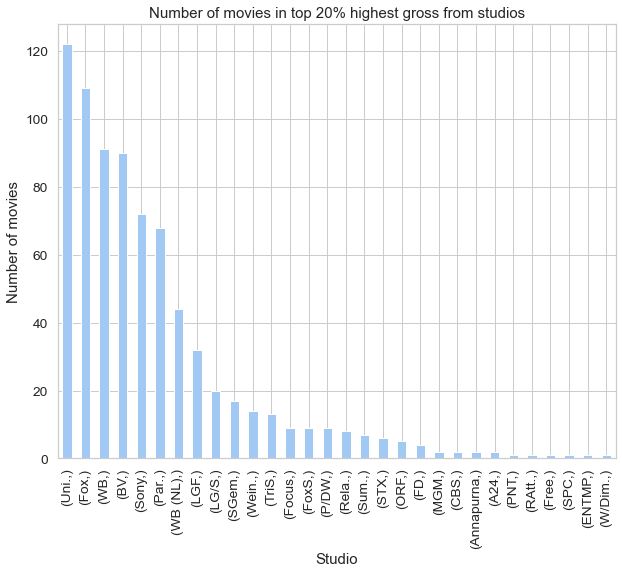

In [80]:
fig_2, ax = plt.subplots()
ax = studio_2.plot(kind='bar')
ax.set_title('Number of movies in top 20% highest gross from studios')
ax.set(xlabel='Studio', ylabel='Number of movies');

- BV studio made the highest grossing movie and made 4 in 5 of the top grossing movies however top 5 studios has most movies in top 20% grossing movie domestically are: Uni, Fox, WB, BV, SONY. 
- Top 5 studios which makes the most movies with average rating >= 8 are: IFC, Uni, Fox, WB, Magn. 

## 7.3 The Numbers 
tn.movie_budgets has information on budget and domestic and internationally gross and their release date. Using these information we can investigate which season is the most profitable to release movies. 

- Number of movies released each season

In [81]:
number_of_movies_season = pd.DataFrame({'Number of movies': df_4.release_season.value_counts()}, index=df_4['release_season'].unique())
number_of_movies_season

,Number of movies
Winter,1484
Spring,1331
Summer,1415
Autumn,1552


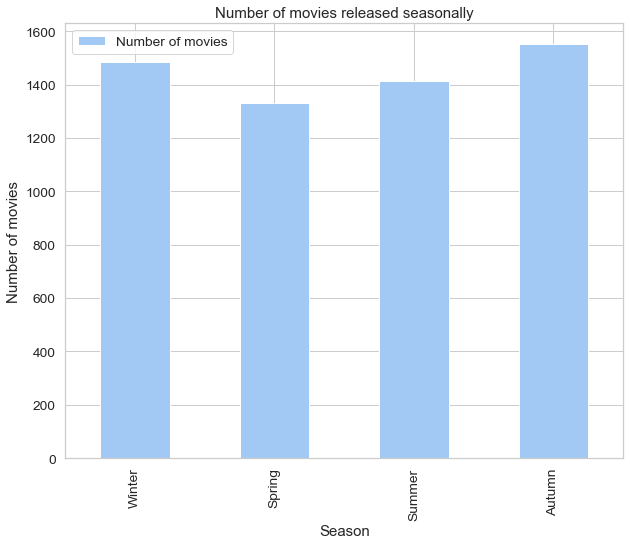

In [82]:
num_movies = number_of_movies_season.plot(kind='bar')
num_movies.set_title('Number of movies released seasonally', fontsize=15)
num_movies.set(xlabel='Season', ylabel='Number of movies');

**a. Most profitable season to release movie using ROI as measure**

In [83]:
#creating new columns for Domestic and worldwide net profit 
df_4['Domestic Net profit']= df_4['domestic_gross'] - df_4['production_budget']
df_4['Worldwide Net profit']= df_4['worldwide_gross'] - df_4['production_budget']
df_4['Domestic ROI'] = df_4['Domestic Net profit']/df_4['production_budget']*100
df_4['Worldwide ROI'] = df_4['Worldwide Net profit']/df_4['production_budget']*100
df_4

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,release_season,release_year,Domestic Net profit,Worldwide Net profit,Domestic ROI,Worldwide ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter,2009,335507625,2351345279,78.942971,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,2011,-169536125,635063875,-41.289850,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer,2019,-307237650,-200237650,-87.782186,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,2015,128405868,1072413963,38.840250,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,2017,303181382,999721747,95.640815,315.369636
...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Winter,2018,-7000,-7000,-100.000000,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Spring,1999,42482,234495,708.033333,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Summer,2005,-3662,-3662,-73.240000,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Autumn,2015,-1400,-1400,-100.000000,-100.000000


In [84]:
df_4.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,Domestic Net profit,Worldwide Net profit,Domestic ROI,Worldwide ROI
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,1.028557e+07,5.989970e+07,198.354021,380.016137
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,4.992137e+07,1.460889e+08,2608.659060,2953.028231
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,-3.072376e+08,-2.002376e+08,-100.000000,-100.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,-9.132757e+06,-2.189071e+06,-79.436711,-50.770440
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,-3.487755e+05,8.550286e+06,-12.167378,70.830983
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,1.778144e+07,6.096850e+07,105.814816,275.834608
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,6.306622e+08,2.351345e+09,179900.000000,179900.000000


#### Return of investment (ROI)

In [85]:
domestic_ROI = df_4.groupby('release_season')['Domestic ROI'].median()
worldwide_ROI = df_4.groupby('release_season')['Worldwide ROI'].median()
ROI = pd.DataFrame({'Dom_ROI': domestic_ROI  ,'World_ROI': worldwide_ROI}, 
                    index = df_4['release_season'].unique())
ROI

,Dom_ROI,World_ROI
Winter,-21.590148,61.989135
Spring,-13.215180,61.919883
Summer,7.878013,103.309557
Autumn,-19.851358,56.630050


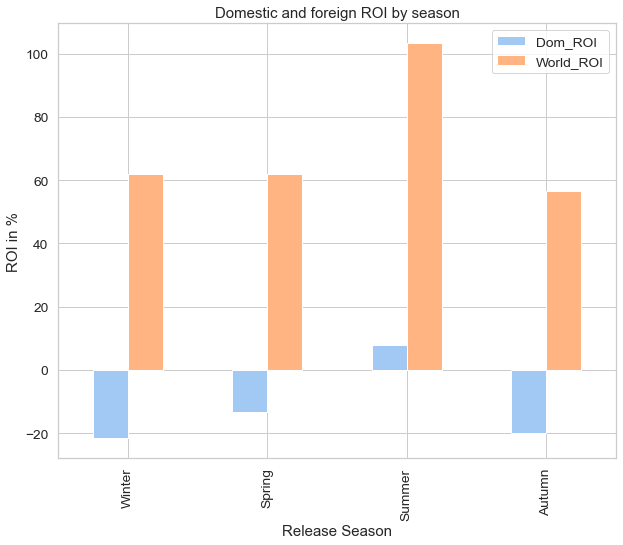

In [114]:
bar = ROI.plot(kind='bar')
bar.set_title('Domestic and foreign ROI by season', fontsize=15)
bar.set(xlabel='Release Season', ylabel='ROI in %')
plt.savefig('bar.png');

**b. Most profitable season to release movie based on net profit using median(), max()**

- Domestic profit in negative, let's investigate by year 

In [87]:
domestic_net = df_4.groupby('release_year')['Domestic Net profit'].median()
domestic_net

release_year
1915     9890000.0
1916     3707046.5
1920     2900000.0
1925     7927500.0
1927    -2000000.0
           ...    
2016    -1302924.0
2017    -1220307.0
2018     5607431.0
2019   -11000000.0
2020   -82000000.0
Name: Domestic Net profit, Length: 96, dtype: float64

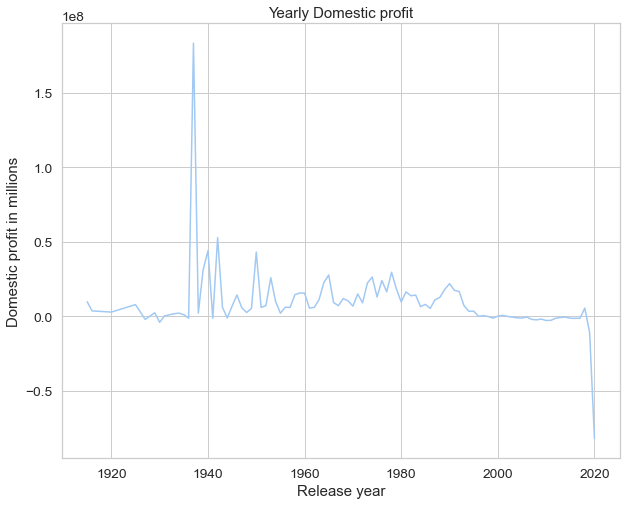

In [88]:
line = domestic_net.plot()
line.set_title('Yearly Domestic profit', fontsize=15)
line.set(xlabel='Release year', ylabel='Domestic profit in millions');

2020 showed negative trend which is an outlier due to unprecedented COVID pandamic. Let's take out all values for 2020 and look at titles in the last 20 years see if that has any effects 

In [89]:
df_4_without2020 = df_4.loc[df_4['release_year'] <= 2019]
df_4_without2020

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,release_season,release_year,Domestic Net profit,Worldwide Net profit,Domestic ROI,Worldwide ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Winter,2009,335507625,2351345279,78.942971,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,2011,-169536125,635063875,-41.289850,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer,2019,-307237650,-200237650,-87.782186,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,2015,128405868,1072413963,38.840250,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,2017,303181382,999721747,95.640815,315.369636
...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Winter,2018,-7000,-7000,-100.000000,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Spring,1999,42482,234495,708.033333,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Summer,2005,-3662,-3662,-73.240000,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Autumn,2015,-1400,-1400,-100.000000,-100.000000


**Profits with 2020 data included**

In [97]:
#profit vs budget by season  
domestic_by_season = df_4.groupby('release_season')['Domestic Net profit'].median()
worldwide_by_season = df_4.groupby('release_season')['Worldwide Net profit'].median()
budget_by_season = df_4.groupby('release_season')['production_budget'].median()
budget_vs_profit = pd.DataFrame({'Dom_prof': domestic_by_season  ,'World_prof': worldwide_by_season, 
                                 'Budget': budget_by_season}, 
                                     index = df_4['release_season'].unique())

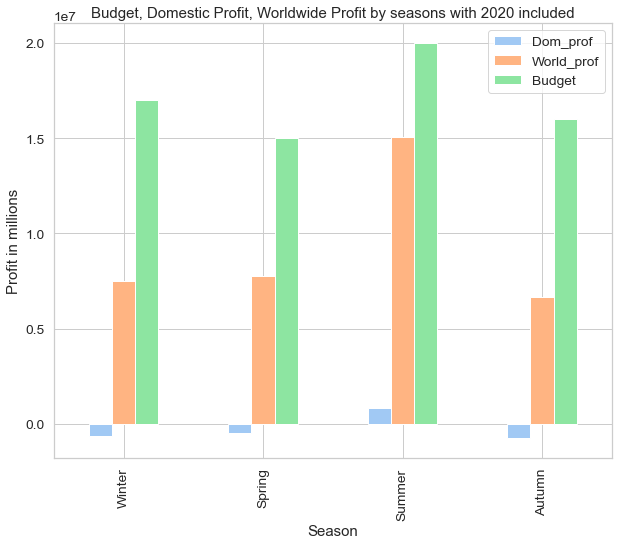

In [113]:
axes = budget_vs_profit.plot(kind='bar')
axes.set_title('Budget, Domestic Profit, Worldwide Profit by seasons with 2020 included')
axes.set(xlabel='Season', ylabel='Profit in millions');

**Profit without 2020 included** 

In [99]:
#profit vs budget by season  without 2020 
domestic_by_season_2 = df_4_without2020.groupby('release_season')['Domestic Net profit'].median()
worldwide_by_season_2 = df_4_without2020.groupby('release_season')['Worldwide Net profit'].median()
budget_by_season_2 = df_4_without2020.groupby('release_season')['production_budget'].median()
budget_vs_profit_2 = pd.DataFrame({'Dom_prof': domestic_by_season_2  ,'World_prof': worldwide_by_season_2, 
                                 'Budget': budget_by_season_2}, 
                                     index = df_4_without2020['release_season'].unique())

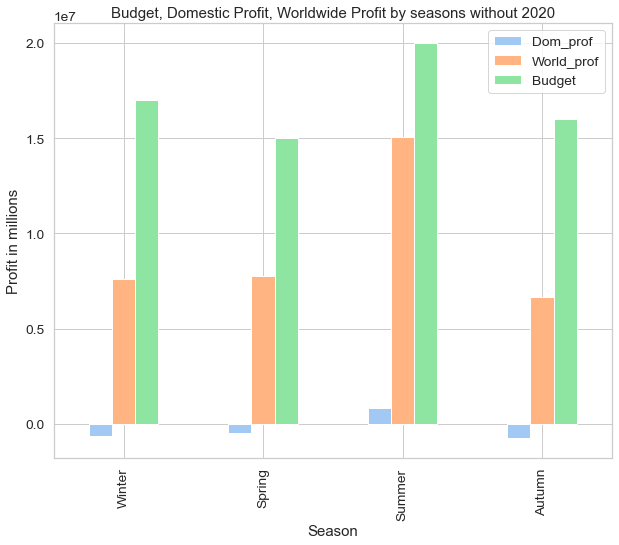

In [100]:
axes_2 = budget_vs_profit_2.plot(kind='bar')
axes_2.set_title('Budget, Domestic Profit, Worldwide Profit by seasons without 2020')
axes_2.set(xlabel='Season', ylabel='Profit in millions');

**Showed that 2020 outlier did not have an effect on our data analysis becasue we used median to compared net profit by seasons**

- Boxplot to show distribution of profit and budget by season 

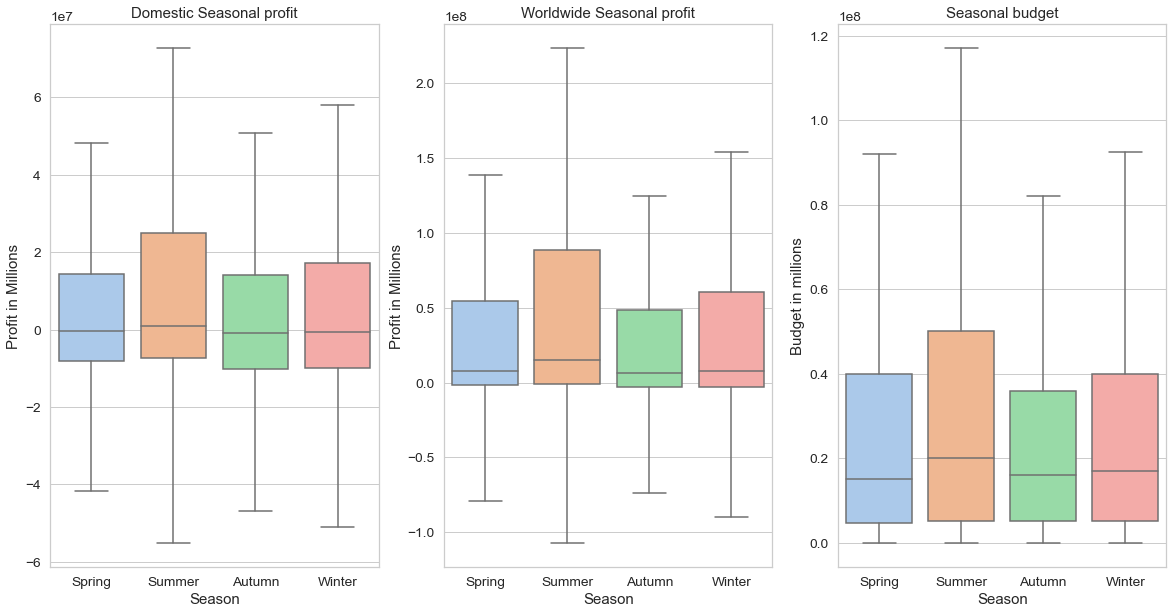

In [101]:
season_list = ['Spring', 'Summer', 'Autumn', 'Winter']
fig_6, axes_6 = plt.subplots(figsize=(20,10), ncols=3)

sns.boxplot(x='release_season', y='Domestic Net profit', ax=axes_6[0], data=df_4, showfliers=False, order=season_list)
sns.boxplot(x='release_season', y='Worldwide Net profit', ax=axes_6[1], data=df_4, showfliers=False, order=season_list)
sns.boxplot(x='release_season', y='production_budget', ax=axes_6[2], data=df_4, showfliers=False, order=season_list)

axes_6[0].set_xlabel('Season', fontsize = 15)
axes_6[0].set_ylabel('Profit in Millions', fontsize = 15)
axes_6[0].set_title('Domestic Seasonal profit', fontsize = 15)

axes_6[1].set_xlabel('Season', fontsize = 15)
axes_6[1].set_ylabel('Profit in Millions', fontsize = 15)
axes_6[1].set_title('Worldwide Seasonal profit', fontsize = 15)

axes_6[2].set_xlabel('Season', fontsize = 15)
axes_6[2].set_ylabel('Budget in millions', fontsize = 15)
axes_6[2].set_title('Seasonal budget', fontsize = 15);

#### Investigating seasonal profit by maximal values 

In [102]:
#find top profit season domestically
top_season_domestic = df_4.groupby('release_season')['Domestic Net profit'].max()
#Find top grossing season worldwide
top_season_worldwide = df_4.groupby('release_season')['Worldwide Net profit'].max()

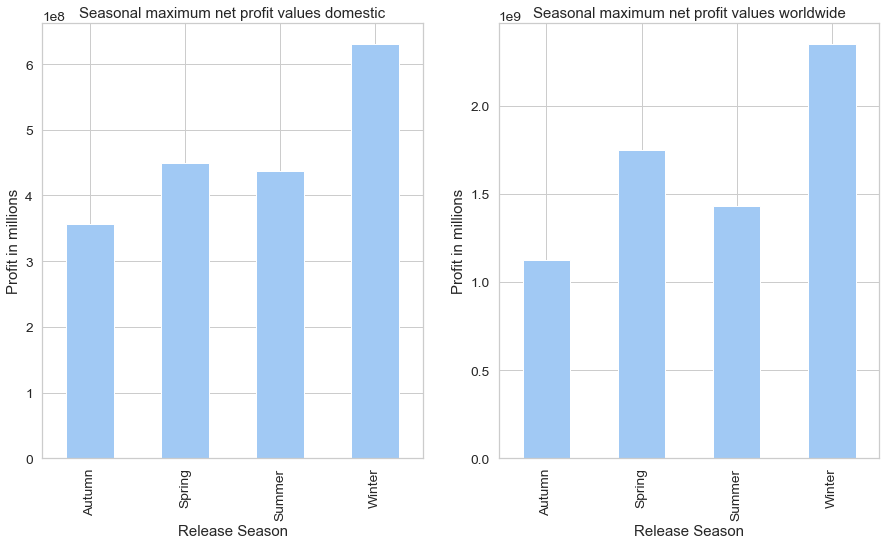

In [103]:
fig_3, axes_1 = plt.subplots(figsize=(15,8), ncols=2)
max_dom = top_season_domestic.plot(kind='bar', ax= axes_1[0])
max_dom.set_title('Seasonal maximum net profit values domestic')
max_dom.set(xlabel='Release Season', ylabel='Profit in millions');

max_world = top_season_worldwide.plot(kind='bar', ax= axes_1[1])
max_world.set_title('Seasonal maximum net profit values worldwide')
max_world.set(xlabel='Release Season', ylabel='Profit in millions');

In [104]:
#Find maximal budget by season
top_season_budget = df_4.groupby('release_season')['production_budget'].max()
#creating dataframe 
top_release_season_max = pd.DataFrame({'Dom_profit': top_season_domestic,
                                       'World_profit': top_season_worldwide,
                                       'Budget':top_season_budget}, 
                                     index = df_4['release_season'].unique())

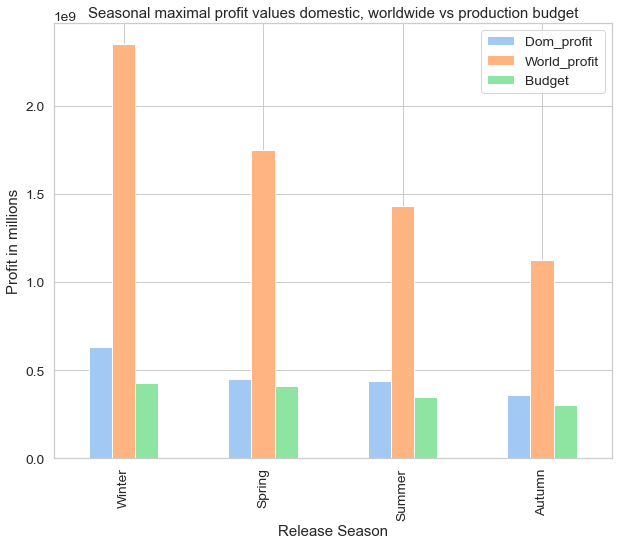

In [105]:
ax_3 = top_release_season_max.plot(kind='bar')
ax_3.set_title('Seasonal maximal profit values domestic, worldwide vs production budget')
ax_3.set(xlabel='Release Season', ylabel='Profit in millions');

#### Investigating season profit using median()

In [106]:
#using median value instead of max value to find most profitable season with minimal effects of outliers
top_season_domestic_median = df_4.groupby('release_season')['Domestic Net profit'].median()
top_season_worldwide_median = df_4.groupby('release_season')['Worldwide Net profit'].median()
top_season_budget_median = df_4.groupby('release_season')['production_budget'].median()
top_release_season_median = pd.DataFrame({'Dom_profit': top_season_domestic_median,
                                          'World_profit': top_season_worldwide_median,
                                          'Budget':top_season_budget_median}, 
                                     index = df_4['release_season'].unique())

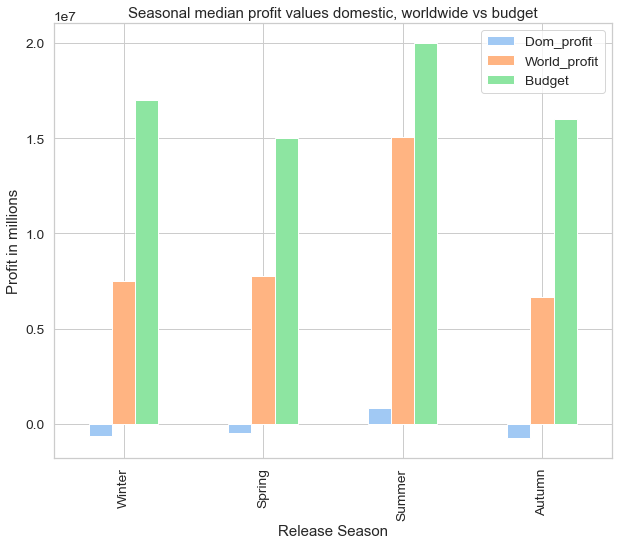

In [107]:
ax_4 = top_release_season_median.plot(kind='bar')
ax_4.set_title('Seasonal median profit values domestic, worldwide vs budget')
ax_4.set(xlabel='Release Season', ylabel='Profit in millions');

**Seasonal profit by maximal values vs median values**

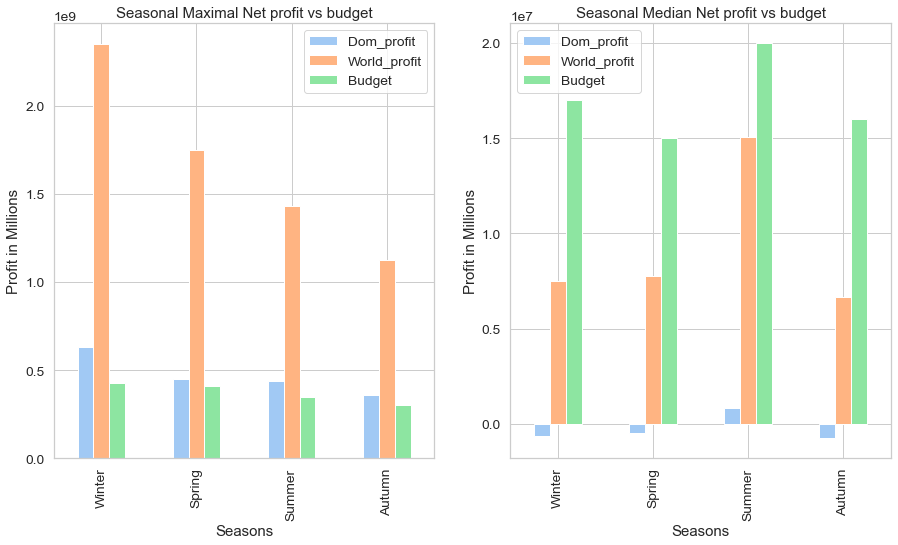

In [108]:
fig_9, axes = plt.subplots(figsize=(15,8), ncols=2)
top_release_season_max.plot(kind='bar', ax=axes[0])
top_release_season_median.plot(kind='bar', ax= axes[1])
axes[0].set_title('Seasonal Maximal Net profit vs budget')
axes[0].set_ylabel('Profit in Millions')
axes[0].set_xlabel('Seasons')
axes[1].set_title('Seasonal Median Net profit vs budget')
axes[1].set_ylabel('Profit in Millions')
axes[1].set_xlabel('Seasons');

**c. Correlation between production budget and profit**

In [109]:
list_1=['Domestic Net profit','Worldwide Net profit','production_budget']
corr_budget_profit = df_4[list_1].corr()
corr_budget_profit

,Domestic Net profit,Worldwide Net profit,production_budget
Domestic Net profit,1.000000,0.756767,0.099742
Worldwide Net profit,0.756767,1.000000,0.608752
production_budget,0.099742,0.608752,1.000000


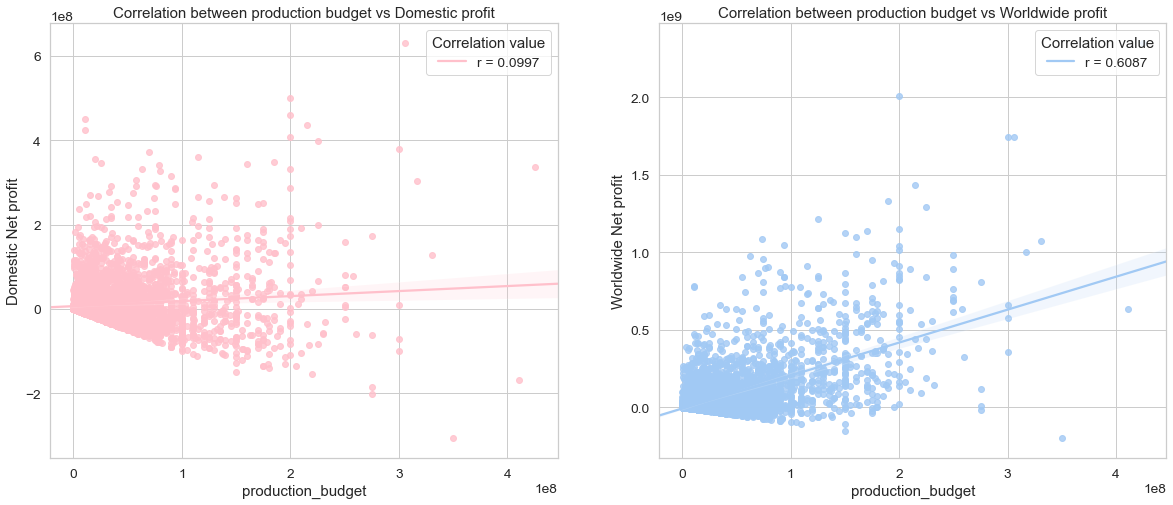

In [112]:
fig_10, axes = plt.subplots(figsize=(20,8), ncols=2)

sns.regplot(x=df_4['production_budget'], y=df_4['Domestic Net profit'], ax = axes[0], truncate=False, color='pink')
sns.regplot(x=df_4['production_budget'], y=df_4['Worldwide Net profit'], ax = axes[1], truncate=False)
axes[0].set_title('Correlation between production budget vs Domestic profit')
axes[1].set_title('Correlation between production budget vs Worldwide profit')
axes[0].legend(title='Correlation value', loc='upper right', labels=['r = 0.0997'])
axes[1].legend(title='Correlation value', loc='upper right', labels=['r = 0.6087'])
plt.savefig('fig_10.png');

**d. Production Budget**
- Finding median budget for top 20% highest profitable movies 

**Merging top_rating and df_4 to create dataframe genre_season**
- To find which genres are performing well seasonally
- We're merging df top rating with df_4 on right merge to preserve keys on df_4 because our target variables are season and net profit to measure each genre performance seasonally 

In [ ]:
genre_season = pd.merge(top_rating, df_4, how='right', on = 'primary_title')
genre_season.head()

In [ ]:
top_budget_domestic = genre_season.loc[genre_season['Domestic Net profit'] > genre_season['Domestic Net profit'].quantile(0.80)]
top_budget_domestic.production_budget.median()

In [ ]:
top_budget_worldwide = df_4.loc[df_4['Worldwide Net profit'] > genre_season['Worldwide Net profit'].quantile(0.80)]
top_budget_worldwide.production_budget.median()

Top 20% highest profit movies production budget is 30 millions domestically and 57.75 millions worldwide.

**e. Most profitable genres seasonally**

Top profitable genre by ROI

In [ ]:
genres_ROI = genre_season.loc[genre_season['Domestic ROI'] > genre_season['Domestic ROI'].quantile(0.80), ['genres']]
genres_ROI.value_counts(ascending=False)

List of most common genres in each season

In [ ]:
genres_counts_season = pd.DataFrame(genre_season.groupby('release_season')['genres'].value_counts())
genres_counts_season

Top 20% highest domestic ROI genres in each season

In [ ]:
top_genres_season_dom = genre_season.loc[genre_season['Domestic ROI'] > genre_season['Domestic ROI'].quantile(0.80)]
top_genres_season_dom.groupby('release_season')['genres'].value_counts()

Top 20% highest worldwide ROI genres in each season

In [ ]:
top_genres_season_world = genre_season.loc[genre_season['Worldwide ROI'] > genre_season['Worldwide ROI'].quantile(0.80)]
top_genres_season_world.groupby('release_season')['genres'].value_counts()

## 8. Evaluation

From analysing data on variable genres, results showed that:
- The top 5 most common genres are:
1. Documentary
2. Drama
3. Comedy
4. Horror
5. Comedy,Drama

- The top 5 movies genres with highest number of votes and average rating >=8 are : 
1. Action,Adventure,Sci-Fi
2. Action,Thriller
3. Adventure,Drama,Sci-Fi
4. Drama,Western
5. Biography,Crime,Drama

- Average runtime for movies with average rating >=8 is 87 minutes. Histogram of runtime of all movies with average rating >=8 showed most movies concentrate around 80-100 minutes. 

- The top 5 movies genres with highest box office gross domestically are:
1. Action,Adventure,Sci-Fi
2. Action,Adventure,Fantasy
3. Action,Adventure,Animation 
4. Adventure,Animation,Comedy
5. Action,Thriller 

- The to 5 movies genres with highest box office gross internationally are:
1. Action,Adventure,Sci-Fi 
2. Adventure,Animation,Comedy 
3. Adventure,Drama,Sport
4. Fantasy,Romance
5. Action,Drama,Thriller

- Action, Adventure and Sci-fi dominated box office gross domestically and internationally. Plus also it has most number of votes and good rating. 

- Correlation calculation of domestic gross and international gross showed correlation value of 0.79 which was a strong positive correlation implying movies which tends to do well domestically also has projection to do well internationally. 

Further analysis of studios showed:
- BV studio made the highest grossing movie and made 4 in 5 of the top grossing movies however top 5 studios has most movies in top 20% grossing movie domestically are: Uni, Fox, WB, BV, SONY. 
- Top 5 studios which makes the most movies with average rating >= 8 are: IFC, Uni, Fox, WB, Magn.

These studios will be Microsoft's competitors if they decided to open a studio

Analysis into movies production budget and domestic, global gross and release date showed:
- The number of movies released are generally even across all 4 seasons. 
- Analysing net profit domestically and internationally showed domestically movies tend to make a loss while make profit internationally. Data also showed in 2020, there was a large loss in profit due to COVID pandemic. Analysing data with and without 2020 data included demonstate that by using median we eliminate the effects of outliers. 
- When comparing profit between season, winter has movie with highest profit however when comparing median values across all 4 seasons, Summer stands out to have the highest median net profit. This is further confirmed when comparing ROI, Summer with highest median ROI(103% globally and 7% domestically while all other season's ROI are negative domestically). However, the summer's box plot showed longer whiskers and box suggesting profit data is more variable. Production Budget boxplot is also showing more variability in summer.
- On average, production budget of movies is between 15-20 millions USD however top 20% profitable movies domestically and globally has median budget about 30 millions and 57.75 millions respectively.
- Investigation into the relationship of budget and net profit showed a weak correlation between production budget and domestic profit yet there is a  mild- moderately positive correlation between production budget and worldwide profit. 

Analysis into whether there is a trend in which movies genres according to different seasons showed:

- In group of movies with rating >= 8, top 3 most common genres for:
    
    Autumn: Drama, Documentary, Adventure, Drama/Sci-Fi
    
    Spring: Documentary, Action/Aventure/Sci-Fi, Drama
    
    Summer: Documentary, Drama, Action/Adventure/Scifi
    
    Winter: Drama, Documentary, Action/Adventure/Animation

- In top 20% quantile Worldwide ROI, movies with highest profit, most common genres were:
    
    Autumn: Biography,Drama, Crime 
    
    Spring: Action, Adventure, Sci-Fi
    
    Summer: Drama, Adventure/Animation/Comedy
    
    Winter: all genres were quite even mostly Documentary, Action, Animation,Adventure, Drama, Comedy, Thriller

- In top 20% quantile Domestic ROI, movies with highest profit, most common genres were:
   
    Autumn: Biography,Drama, Crime 
    
    Spring: Drama, Thriller
    
    Summer: Drama, Documentary, Thriller
    
    Winter: all genres were quite even mostly Documentary, Action, Animation, Adventure, Drama, Comedy, Thriller

## 9. Conclusions

This analysis leads to 3 recommendations for Microsoft new movie studio:
- **Focus on Drama, Documentary, Action/Adventure/Sci-fi movies with runtime around 80-100 minutes in Summer and Action, Animation, Adventure in Winter.** These movies tend be the highest gross domestically and internationally. They tend to have higher number of votes by audience and has decent average rating. The median runtime for movies with average rating >=8. 
- **Plan release date of movies around June - August during summer break OR winter between December-Feb (Holidays season)** Movies released in summer tend to have higher return on investment (ROI) overall (103% globally and 7% domestically while all other seasons have negative ROI domestically). However data is more variable so projection might not be as accurate. Winter on the otherhand has narrower range which is less variable and boxplot showed distribution is postively skewed meaning higher frequency of higher profit. 
- **Production budget around 30 millions domestically and upto 60 millions internationally** For the top 20% highest profit movies, the median production budget is 30 millions while the median production budget for all movies is around 15-20 millions. Movies has high profit domestically tends to have high profit internationally. Higher budget does not equate to higher profit as correlation between production budget is weak domestically and somewhat mildly correlated internationally. 


## 10. Limitation:

- **Runtime:** significant nulls values. We also did not taken movies with average rating less than 8. Unclear if runtime has any effect on average rating
- **Data currency:** IMBd Data stops at 2018 and The numbers data stops at 2020 - having access to more recent data can help us visualise the movie industry/market in recovery period post COVID. This will help us predict future trends more accurately 
- **Missing data:** Box office Moji bom.movie_gross has large amount of missing data in foreign gross - reduced credibility of analysis. 

## 11. Future Considerations:

- Analyse other performance metrics such as critic, reviews and investigate other databases. This will help predicting a movie performance/profitablity and budget more accurately 
- Analysing runtime, average rating and profit. This will help establish whether runtime would affect user rating or generate more profit. 
- Analysing data on directors, writers, actors and crews. This would allow more efficiency to for staff recruitment, recruiting the right person  
- Research in competitors business model. This would allow us to have insights into their competitor business model to help build our own. 

For More Information

See the full analysis in the Jupyter Notebook or review this presentation.

For additional info, contact:

Ngoc Ho yen.ho993@gmailcom